## Suicide rates in areas within the London region

In [1]:
# Dependencies and Setup
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
during_covid_path = "CSVs/DuringCovid_a.csv"
pre_covid_path = "CSVs/PreCovid_a.csv"

# Read the covid data and the study results
during_covid = pd.read_csv(during_covid_path)
pre_covid = pd.read_csv(pre_covid_path)


# Display the data table for preview


In [2]:
during_covid

,Parent Name,Area Name,Time period,Value,Count,Compared to England value or percentiles,Compared to Region value or percentiles
0,North East region,Hartlepool,2019 - 21,14.667019,36.0,Similar,Similar
1,North East region,Middlesbrough,2019 - 21,14.879852,54.0,Worse,Similar
2,North East region,Redcar and Cleveland,2019 - 21,19.750601,69.0,Worse,Worse
3,North East region,Stockton-on-Tees,2019 - 21,10.206445,52.0,Similar,Similar
4,North East region,Darlington,2019 - 21,16.598023,47.0,Worse,Similar
...,...,...,...,...,...,...,...
147,East of England region,Suffolk,2019 - 21,10.387505,208.0,Similar,Similar
148,South East region,Surrey,2019 - 21,10.096817,316.0,Similar,Similar
149,West Midlands region,Warwickshire,2019 - 21,11.215052,172.0,Similar,Similar
150,South East region,West Sussex,2019 - 21,11.533312,265.0,Similar,Similar


In [3]:
pre_covid

,Parent Name,Area Name,Time period,Value,Count,Compared to England value or percentiles,Compared to Region value or percentiles
0,North East region,Hartlepool,2017 - 19,10.361530,26.0,Similar,Similar
1,North East region,Middlesbrough,2017 - 19,14.464680,49.0,Worse,Similar
2,North East region,Redcar and Cleveland,2017 - 19,13.538658,47.0,Similar,Similar
3,North East region,Stockton-on-Tees,2017 - 19,8.673680,45.0,Similar,Better
4,North East region,Darlington,2017 - 19,13.646433,38.0,Similar,Similar
...,...,...,...,...,...,...,...
145,East of England region,Suffolk,2017 - 19,9.531723,188.0,Similar,Similar
146,South East region,Surrey,2017 - 19,8.180909,255.0,Better,Better
147,West Midlands region,Warwickshire,2017 - 19,9.382023,143.0,Similar,Similar
148,South East region,West Sussex,2017 - 19,9.678995,216.0,Similar,Similar


In [4]:
#Dataframe for areas in the London region pre-covid
not_lr = []
for x in range(len(pre_covid)):
    if pre_covid["Parent Name"][x] != "London region":
        not_lr.append(x)
pre_covid.drop(not_lr, inplace=True)
pre_covid.reset_index(drop=True, inplace=True)
pre_covid

,Parent Name,Area Name,Time period,Value,Count,Compared to England value or percentiles,Compared to Region value or percentiles
0,London region,City of London,2017 - 19,NaN,4.0,Not compared,Not compared
1,London region,Barking and Dagenham,2017 - 19,6.066265,32.0,Better,Similar
2,London region,Barnet,2017 - 19,6.707621,66.0,Better,Similar
3,London region,Bexley,2017 - 19,8.924822,57.0,Similar,Similar
4,London region,Brent,2017 - 19,7.070716,61.0,Better,Similar
5,London region,Bromley,2017 - 19,7.436294,64.0,Better,Similar
6,London region,Camden,2017 - 19,11.343694,69.0,Similar,Worse
7,London region,Croydon,2017 - 19,9.535119,93.0,Similar,Similar
8,London region,Ealing,2017 - 19,9.072835,78.0,Similar,Similar
9,London region,Enfield,2017 - 19,5.887038,50.0,Better,Better


In [5]:
#Dataframe for areas in the London region during covid
not_lr_c = []
for x in range(len(during_covid)):
    if during_covid["Parent Name"][x] != "London region":
        not_lr_c.append(x)
during_covid.drop(not_lr_c, inplace=True)
during_covid.reset_index(drop=True, inplace=True)
during_covid

,Parent Name,Area Name,Time period,Value,Count,Compared to England value or percentiles,Compared to Region value or percentiles
0,London region,City of London,2019 - 21,NaN,3.0,Not compared,Not compared
1,London region,Barking and Dagenham,2019 - 21,8.816308,44.0,Similar,Similar
2,London region,Barnet,2019 - 21,4.768270,50.0,Better,Better
3,London region,Bexley,2019 - 21,7.225304,47.0,Better,Similar
4,London region,Brent,2019 - 21,5.264526,47.0,Better,Better
5,London region,Bromley,2019 - 21,5.136692,43.0,Better,Better
6,London region,Camden,2019 - 21,8.897871,55.0,Similar,Similar
7,London region,Croydon,2019 - 21,6.216146,62.0,Better,Similar
8,London region,Ealing,2019 - 21,9.784855,83.0,Similar,Worse
9,London region,Enfield,2019 - 21,5.308389,44.0,Better,Better


In [6]:
labels= ['Barking and Dagenham',  'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster']

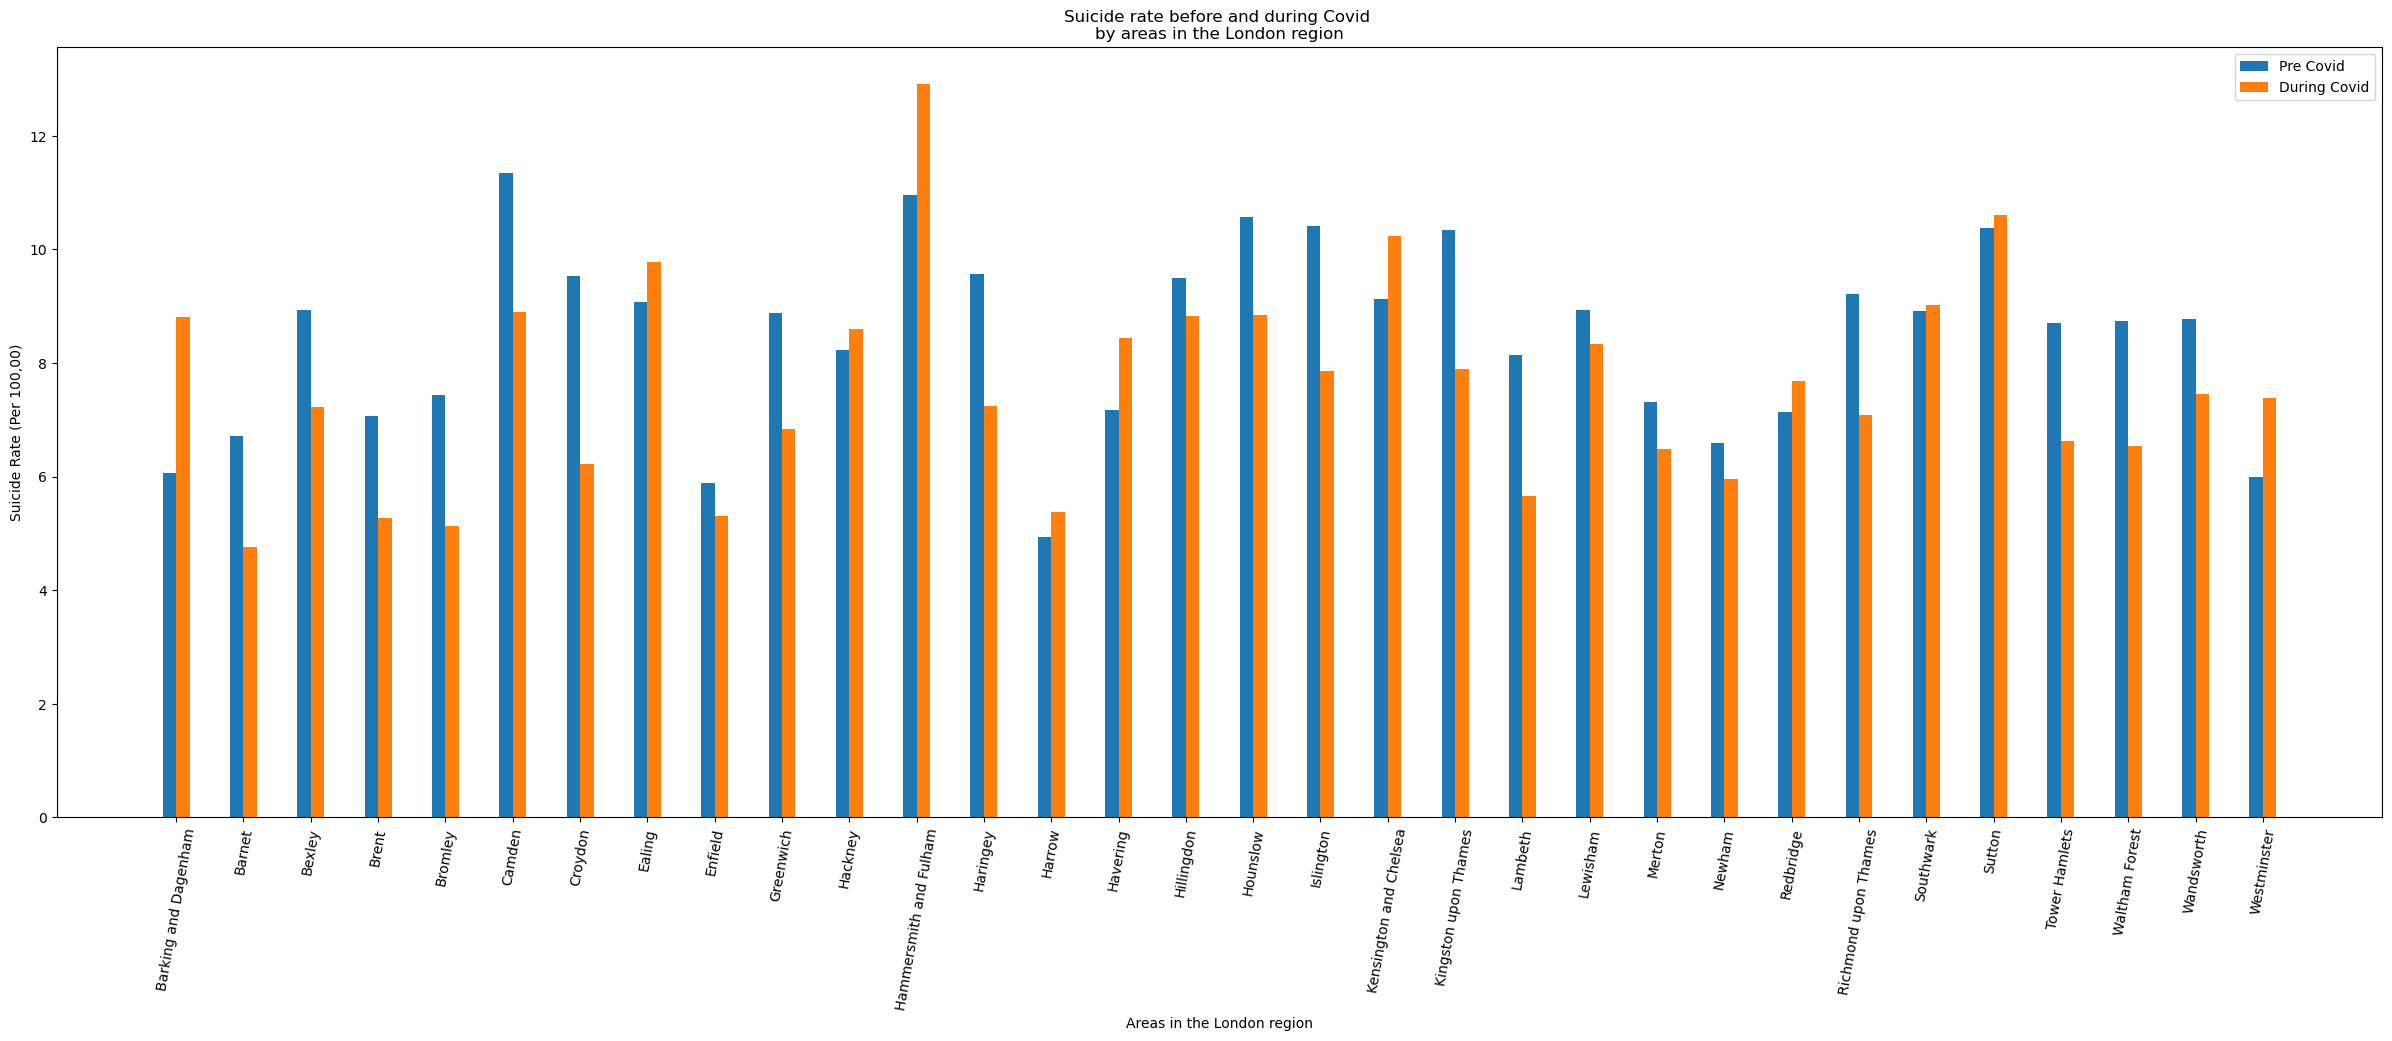

In [11]:
w=0.2
x = ['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham','Haringey', 'Harrow', 'Havering','Hillingdon','Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster']

pre_covid = [6.066265, 6.707621,  8.924822, 7.070716, 7.436294, 11.343694, 9.535119, 9.072835, 5.887038, 8.877856, 8.229369, 10.958199, 9.563817, 4.932766, 7.180964, 9.495983, 10.564505, 10.412614, 9.124496, 10.341803, 8.140767, 8.930034, 7.319035, 6.594160, 7.139417, 9.207278, 8.919773, 10.368256, 8.703623, 8.734307, 8.768473, 5.995366]
during_covid = [8.816308, 4.768270, 7.225304, 5.264526, 5.136692, 8.897871, 6.216146, 9.784855, 5.308389, 6.837920, 8.597457, 12.912275, 7.240601, 5.374674, 8.447265, 8.829208, 8.842165, 7.858980, 10.238240, 7.898383, 5.660215, 8.333238, 6.479712, 5.963181, 7.680508, 7.083961, 9.015502, 10.603738, 6.625520, 6.535544, 7.458149, 7.388662]


bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1, pre_covid,w,label="Pre Covid")
plt.bar(bar2, during_covid,w,label="During Covid")

plt.xlabel('Areas in the London region')
plt.ylabel('Suicide Rate (Per 100,00)')
plt.title('Suicide rate before and during Covid \nby areas in the London region')
plt.legend()
plt.xticks(bar1+w/2, x, rotation=80)
plt.rcParams["figure.figsize"] = (30,10)
plt.savefig('Images/suicide_by_area_London_region.png')
